### Group Contributions Statement

The three of together worked on cleaning the data and choosing which variables we wanted to work with. Ryan created the first scatterplot in which the species are all on the same plot. Maggie created the next two histograms. Yixiang made the faceted histogram seperated by island. Maggie used the sklearn model to find the correlation scores. Ryan made the correlation heatmap. Ryan made the confusion matrix function. Yixiang made the decision boundary function. Ryan did the neural network model. Maggie did the random forest model. Roger did the logistic regression model. We checked each others work before turning in.

# Penguins Project

For our final project, our goal is to determine which measurements help predict a penguin's species as either Adelie, Chinstrap or Gentoo by using 1 qualitative feature and 2 quanitative features.

### Data import and cleaning
We first have to store the data in a variable named "penguins". Analyzing the data, we can see that there are NaN values, which we should remove.


In [43]:
#imports all modules that we will be using later on
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap
from sklearn.feature_selection import f_classif
import warnings


url = "https://philchodrow.github.io/PIC16A/content/IO_and_modules/IO/palmer_penguins.csv"
penguins = pd.read_csv(url)
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


We initialize X with measurements from the penguins' data to determine later whether they are useful or not. y is intialized with the dependent variable of the penguins' species, which is based on the meaasurements. Then, we split X and y into training and testing datasets, and check their shapes.



In [44]:
X = penguins[['Island','Culmen Length (mm)','Clutch Completion','Culmen Depth (mm)',
              'Flipper Length (mm)','Body Mass (g)','Sex','Delta 15 N (o/oo)','Delta 13 C (o/oo)']]
#creates X with columns that we decided may or may not be useful later on based on penguins dataset
y = penguins['Species']
#creates y with dependent variable based on penguins dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=56)
#splits X and y into training and test groups
X_train.shape,X_test.shape,y_train.shape,y_test.shape
#verifies that X and Y are proper shape

((223, 9), (121, 9), (223,), (121,))

We use isna().sum to check for NA values in our training and testing datasets. 

In [65]:
X_train.isna().sum()

Culmen Depth (mm)     0
Culmen Length (mm)    0
Island                0
dtype: int64

In [ ]:
X_test.isna().sum()

In [ ]:
y_train.isna().sum()

In [ ]:
y_test.isna().sum()

Because NaN values represent data that either do not exist or is missing, we can improve the accuracy and predictions of the model by removing them. We should also label Sex and Island using integers.

In [45]:
"""adds labels to dataframe"""
def labeldf(df):
    df = pd.DataFrame(df)
    le = preprocessing.LabelEncoder()
    df = df.apply(le.fit_transform)
    return df

"drops na values from dataframe"
def cleandf(df):
    df = df.dropna() 
    df = df[df['Sex']!='.']
    #gets rid of values where sex is a .
    return df

X = labeldf(X)
y = labeldf(y)

X_train = labeldf(cleandf(X_train))
X_test = labeldf(cleandf(X_test))
y_train = labeldf(y_train)
y_test = labeldf(y_test)

Use isna().sum() again to verify that all NaN values are removed from training and testing datasets.

In [66]:
print(X_train.isna().sum())
print(X_test.isna().sum())
print(y_train.isna().sum())
print(y_test.isna().sum())

Culmen Depth (mm)     0
Culmen Length (mm)    0
Island                0
dtype: int64
Culmen Depth (mm)     0
Culmen Length (mm)    0
Island                0
dtype: int64


AttributeError: 'list' object has no attribute 'isna'

We want to ensure that the training and testing datasets match in shape by dropping the same indices we dropped from X in y. 

In [46]:
new_train_index = [index for index in X_train.index if index in y_train.index]
y_train = y_train.loc[new_train_index]
new_test_index = [index for index in X_test.index if index in y_test.index]
y_test = y_test.loc[new_test_index]
X_train.shape,X_test.shape,y_train.shape,y_test.shape
#verifies that each df is of matching shape

((211, 9), (113, 9), (211, 1), (113, 1))

In [47]:
X_train.head()

,Island,Culmen Length (mm),Clutch Completion,Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
7,2,29,0,60,15,50,1,180,160
298,0,67,1,5,33,53,0,46,24
199,1,96,1,60,30,40,1,171,193
343,0,104,1,27,31,68,1,63,67
169,1,129,0,42,3,23,0,151,182


### Exploratory Analysis

We will visualize the relationship between penguin measurements using 3 figures and 1 table.

The first figure is a scatterplot. We can see the correlation between Culmen depth and Culmen length for Adelie, Gentoo, and Chinstrap. Adelie penguins have a long Culmen Depth and the shortest Culmen Length out of all three species. Gentoo penguins have the shortest Culmen Depth out of all three species and long Culmen Length. Chinstrap penguins have a long Culmen Depth and Length.

## Figure 1: Scatter Plot

Text(0.5, 0.98, 'Culmen Depth vs Culmen Length')

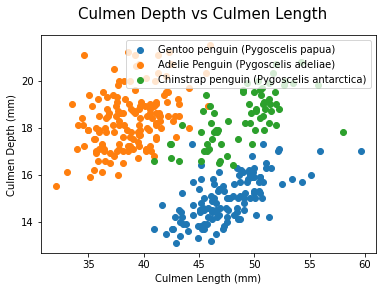

In [48]:
"""creates scatterplot of penguin culmen depth and length colored by species"""
fig, ax = plt.subplots(1)
#resets figure
species = set(penguins['Species'])
#creates list based on all possible species

for s in species:
    # for each species
    i = penguins[penguins['Species'] == s]
    #creates new df based on boolean mask
    ax.scatter(i['Culmen Length (mm)'], i['Culmen Depth (mm)'], label = s)
    #scatter plot for that species

ax.legend()
#adds legend
ax.set(xlabel = 'Culmen Length (mm)',
       ylabel = 'Culmen Depth (mm)')
#sets x and y labels
fig.suptitle('Culmen Depth vs Culmen Length', fontsize=15)
#sets title

## Table 1: Summary Table
As discussed above for the scatterplot, we can see on average, that Adelie penguins have the longest Culmen Length, Chinstrap penguins have the longest Culmen Length, Gentoo penguins have the shortest Culmen Depth. 

In [67]:
def penguin_summary_table(group_cols, value_cols):
    return penguins.groupby(group_cols)[value_cols].mean().round(2)

penguin_summary_table(["Species"], ["Culmen Length (mm)", "Culmen Depth (mm)",'Island'])

,Culmen Length (mm),Culmen Depth (mm)
Species,,
Adelie,38.79,18.35
Chinstrap,48.83,18.42
Gentoo,47.50,14.98


## Figure 2: Histogram

The second figure is a histogram. We can visualize the flipper length and the penguin species and island according to the flipper length. 

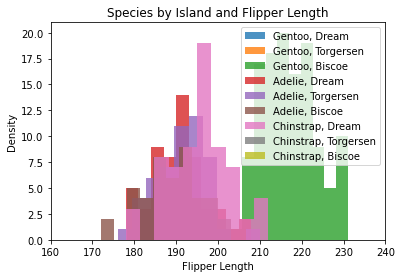

In [49]:
"""creates histogram of df by species and island of flipper length"""
penguins["Species"] = penguins["Species"].str.split().str.get(0) 

fig, ax = plt.subplots(1) 
#resets fig, ax var
species = set(penguins['Species']) 
#assigns all possible species to species var
location = set(penguins['Island'])
#assigns all possible islands to island var
ax.set(xlabel = 'Flipper Length', 
       ylabel = 'Density',
       title = 'Species by Island and Flipper Length')
#sets xlabel, ylabel, and title

for s in species:
    # for every species
    i = penguins[penguins['Species'] == s] 
    #i is boolean mask based on spcies
    for l in location:
        #for every location
        t = i[i['Island'] == l]
        #t is boolean mask based on island
        ax.hist(t['Flipper Length (mm)'], label = str(s) + ', ' + str(l) , alpha = 0.8) 
        #creates histogram
        ax.set_xlim([160,240])
        #sets boundaries of histogram
ax.legend()
#show legend

We separate the histogram into three subplots for each island, Torgensen, Dream, and Biscoe, to be able to visualize the data more clearly. 

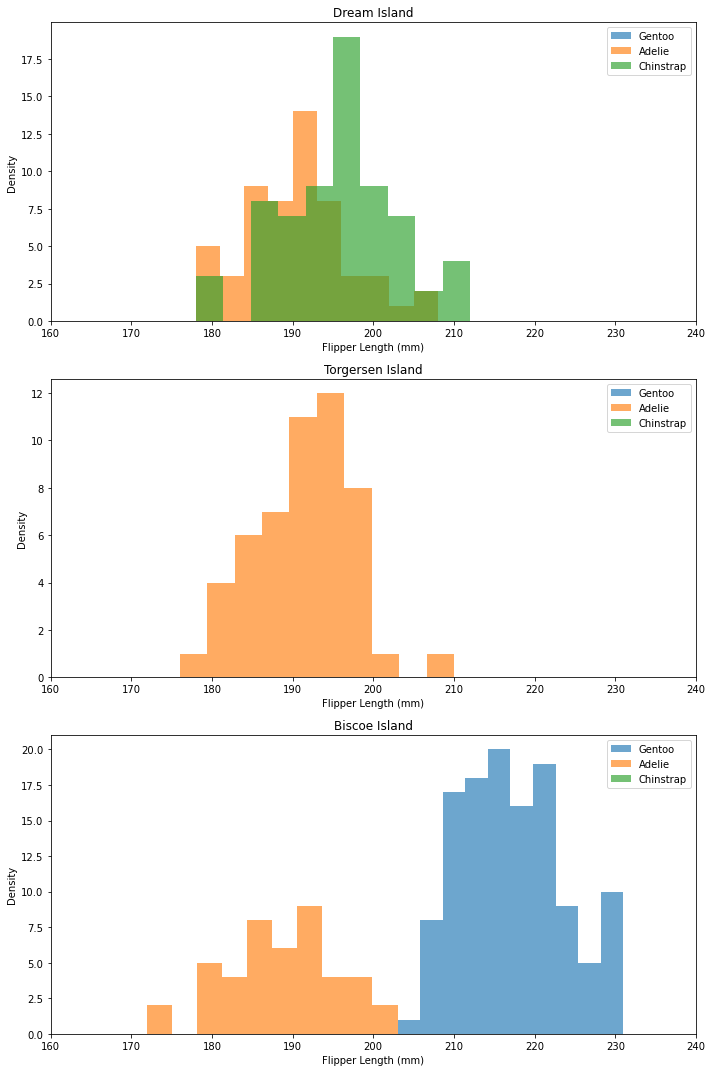

In [50]:
fig, ax = plt.subplots(3) 
#creates faceted histogram with 3
species = set(penguins['Species']) 
location = set(penguins['Island'])
"""This code is essentially the same as the last histogram except it 
seperates the values by island in a facted manner"""
fig.set_figheight(15) 
fig.set_figwidth(10)

count = 0

for l in location:
    for s in species:
        i = penguins[penguins['Species'] == s]
        t = i[i['Island'] == l]
        ax[count].hist(t['Flipper Length (mm)'], label = str(s), alpha = 0.65)
        ax[count].legend()
        ax[count].set(xlabel = 'Flipper Length (mm)', ylabel = 'Density') 
        ax[count].set_title(str(l) + ' Island') 
        ax[count].set_xlim([160,240])
    count += 1    
plt.tight_layout()


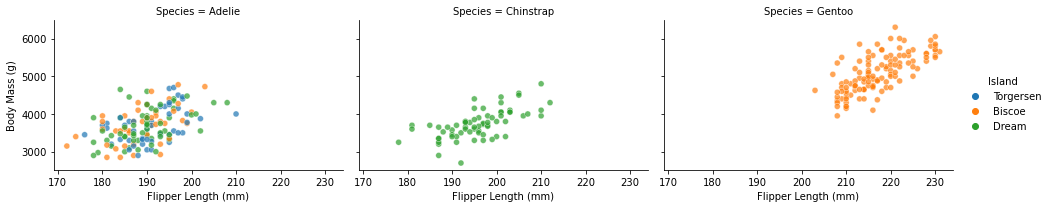

In [51]:
"""Faceted scatterplot of penguins based on island and species"""
fgrid = sns.relplot(x = 'Flipper Length (mm)', 
                    y = 'Body Mass (g)', 
                    hue = "Island", 
                    data = penguins,
                    alpha = .7,
                    col = "Species",
                    height = 3,
                    aspect = 1.5)

## Figure 3: Correlation Heatmap
Highest scores refers to greater correlation with Species variable.  Based on the data we've gotten from the heatmap, we've decided to use Culmen Length and Culmen Depth for our 2 quantitative variables as they happen to have a relatively high correlation with Species. We decided to use Island as our qualitative variable since it has the highest correlation with species among other categorical variables.

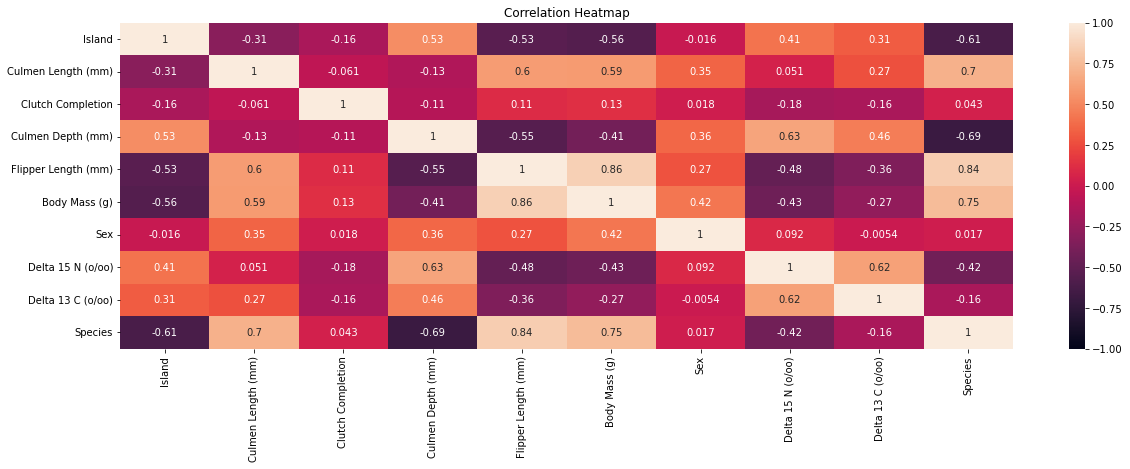

In [53]:
train = pd.concat([X_train,y_train],axis=1)
#combines training data from X and Y
test = pd.concat([X_test,y_test],axis=1)
#combines test data from X and y
new_penguins = pd.concat([train,test],axis=0)
#combines cleaned data into new dataframe

plt.figure(figsize=(20, 6))
#sets figsize
heatmap = sns.heatmap(new_penguins.corr(), vmin=-1, vmax=1, annot=True)
#makes heatmap of correlation of new_penguins df
heatmap.set_title('Correlation Heatmap')
#sets label
plt.show()
#shows heatmap

### Feature Selection

Using the correlation map, and determining the score of the top three features, we decide on the features of Culmen Length, Culmen Depth, and Island.

In [52]:
threshold = 5
high_score_features = []
feature_scores = f_classif(X_train, y_train)[0]

for score, f_name in sorted(zip(feature_scores, X_train.columns), reverse=True)[:threshold]:
    print(f_name, score) 
    high_score_features.append(f_name)

Flipper Length (mm) 382.61585141137044
Culmen Length (mm) 275.10826238905486
Body Mass (g) 246.76011148291468
Culmen Depth (mm) 212.01514804300604
Delta 15 N (o/oo) 167.4476392145739


Highest scores refers to greater correlation with Species variable. Flipper Length, Culmen Length, and Culmen Depth have the highest correlation based on this machine learning algorithm.

Based on the data we've gotten from above we've decided that Culmen Depth, Culmen Length for our quantitative variables as they happen to have a relatively high correlation with Species, while also being relatively dissimilar to each other based on Figure 1. We also decided to use Island as our categorical variable as it has the highest correlation with species among other categorical variables.

### Modeling

We mask the X_train and X_test to only the features we are using and convert y_train and y_test to lists to avoid error. 

In [54]:
features = ['Culmen Depth (mm)', 'Culmen Length (mm)', 'Island']
# features = ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']
#features we decided to use
X_train = X_train[features]
#masks X_train to only relevant features
X_test = X_test[features]
#masks X_train to only relevant features
y_train = y_train['Species'].to_list()
#converts df to list for ease of use
y_test = y_test['Species'].to_list()
#converts df to list for ease of use

We create a function that makes a confusion matrix using predicted values as compared to actual values. 

In [55]:
'''function that makes a confusion matrix using predicted values as compared to actual values'''

def makeCM(y_pred, score):
    plt.clf()
    #resets figure
    cf_matrix = confusion_matrix(y_test, y_pred)
    #uses confusion matrix function to create matrix
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues_r')
    #creates heatmap based on cf_matrix
    ax.set_xlabel('Predicted Species')
    #sets x label
    ax.set_ylabel('Actual Species');
    #sets y label
    ax.xaxis.set_ticklabels(['Adelie','Chinstrap','Gentoo'])
    #sets tick labels
    ax.yaxis.set_ticklabels(['Adelie','Chinstrap','Gentoo'])
    #sets tick labels
    plt.title('Accuracy Score: {0}'.format(round(score,4)), size = 10); 
    #prints accuracy score as title
    return plt

In [56]:
"""Makes decision boundary"""

def plot_decision_boundary(model):
    qual_names = list(set(penguins['Island']))
    qual_names.sort()
    qual_fts = list(set(X['Island']))
    sp_names = ['Adelie','Chinstrap','Gentoo']
    sp_col = ['red','green','blue']
    masks = []
    for i in range(len(qual_fts)):
        masks.append(X['Island'] == qual_fts[i])

    for i in range(len(masks)):
        xi = X[masks[i]]
        x0 = xi[features[0]]
        x1 = xi[features[1]]
        yi = y['Species'][masks[i]]
        grid_x = np.linspace(x0.min(),x0.max(),501)
        grid_y = np.linspace(x1.min(),x1.max(),501)
        z = qual_fts[i]*np.ones(501*501)
        xx,yy = np.meshgrid(grid_x,grid_y)

        XX = xx.ravel()
        YY = yy.ravel()
        ZZ = z.ravel()

        p = model.predict(pd.DataFrame(np.c_[XX,YY,ZZ],columns=features))
        p_values = list(set(p))
        yi_values = list(set(yi))
        color_region = []
        color_scatter = []
        for j in range(len(p_values)): 
            color_region.append(sp_col[p_values[j]])
        for k in range(len(yi_values)): 
            color_scatter.append(sp_col[yi_values[k]])

        self_cmap_region = LinearSegmentedColormap.from_list('mycmap',color_region)

        p=p.reshape(xx.shape)

        fig,ax = plt.subplots(1)

        ax.contourf(xx,yy,p,cmap=self_cmap_region,alpha=.2)

        for s in range(len(yi_values)): 
            maskl = yi==yi_values[s]
            ax.scatter(x0[maskl], x1[maskl], color=sp_col[yi_values[s]], label=sp_names[yi_values[s]])
            ax.set(title="Island"+': '+ qual_names[i])
            ax.set(xlabel = features[0], ylabel = features[1])
            ax.legend()



**Nearest Neighbor**

Best Hidden Layer Size:  3
Test Score Accuracy:  0.9469026548672567
Train Score Accuracy:  0.981042654028436
<module 'matplotlib.pyplot' from 'C:\\Users\\Wiggles\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


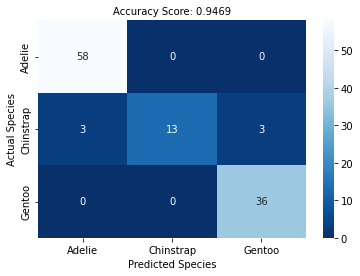

In [58]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)
#sets seed to get consistent results
bestcv = 0
#sets bestcv variable to 0
warnings.filterwarnings("ignore")
#ignores warnings
for i in range (1,30):
#from 1 to 30
    clf = clf = KNeighborsClassifier(n_neighbors = i)
    #create model based on i number of neighbors
    model = clf.fit(X_train, y_train)
    #fit X_train and y_train to model
    newcv = cross_val_score(clf, X_train, y_train, cv = 10).mean()
    #create cross val score for fitted model
    if newcv > bestcv:
        #if better cv score found
        bestcv = newcv
        #set bescv as new cv
        besti = i
        #best hidden layer size is i
        testscore = model.score(X_test, y_test)
        #set best test score
        trainscore = model.score(X_train, y_train)
        #set best model score
        bestcm = makeCM(model.predict(X_test), testscore)
        #set best confusion matrix
print("Best Hidden Layer Size:  " + str(besti))
print("Test Score Accuracy:  " + str(testscore))
print("Train Score Accuracy:  " + str(trainscore))
print(bestcm)
#print best values


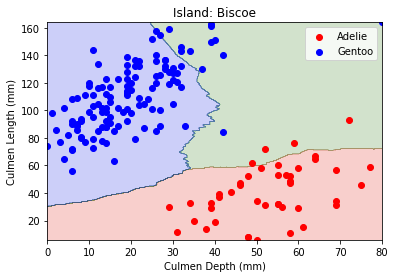

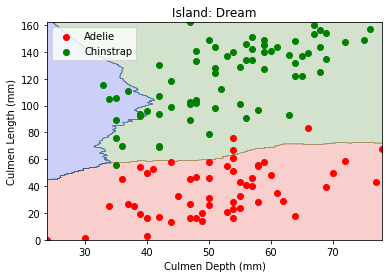

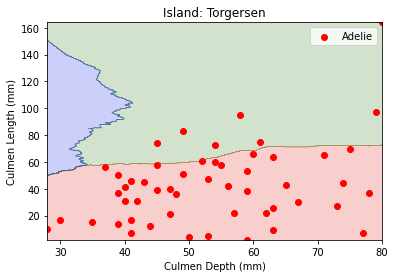

In [59]:
plot_decision_boundary(model)
#creates decision boundary models based on island

**Random Forest**


Best N_Estimator:  14
Best Test Score Accuracy:  0.9646017699115044
Best Train Score Accuracy:  1.0
<module 'matplotlib.pyplot' from 'C:\\Users\\Wiggles\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


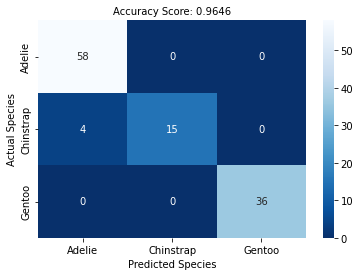

In [60]:
"""very much of the same from the previous model except clf is a random forest classifier rather than an MLP classifier"""
np.random.seed(42)
bestcv = 0
for i in range (1,30):
    clf = RandomForestClassifier(n_estimators = i)
    bestmodel = clf.fit(X_train, y_train)
    newcv = cross_val_score(clf, X_train, y_train, cv = 10).mean()
    if newcv > bestcv:
        bestcv = newcv
        besti = i
        testscore = bestmodel.score(X_test, y_test)
        trainscore = bestmodel.score(X_train, y_train)
        bestcm = makeCM(bestmodel.predict(X_test), testscore)
print("Best N_Estimator:  " + str(besti))
print("Best Test Score Accuracy:  " + str(testscore))
print("Best Train Score Accuracy:  " + str(trainscore))
print(bestcm)

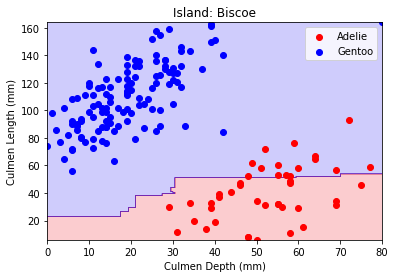

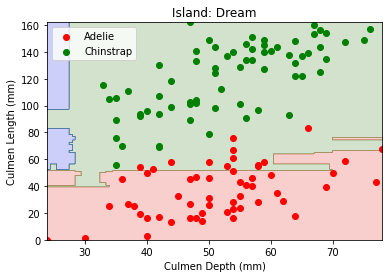

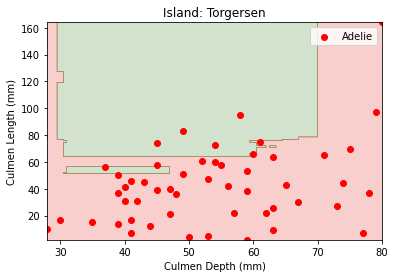

In [61]:
plot_decision_boundary(bestmodel)

**Logistic Regression**

Best N_Estimator:  13
Best Test Score Accuracy:  0.9557522123893806
Best Train Score Accuracy:  0.995260663507109
<module 'matplotlib.pyplot' from 'C:\\Users\\Wiggles\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


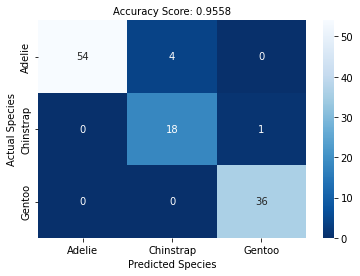

In [62]:
"""very much of the same from the previous model except clf is a Logistic Regression rather than an MLP classifier"""
bestcv = 0
for i in range (1,50):
    clf = LogisticRegression(C = i*.1, max_iter = 5000).fit(X_train, y_train)
    bestmodel = clf.fit(X_train, y_train)
    newcv = cross_val_score(clf, X_train, y_train, cv = 10).mean()
    if newcv > bestcv:
        bestcv = newcv
        besti = i
        testscore = bestmodel.score(X_test, y_test)
        trainscore = bestmodel.score(X_train, y_train)
        bestcm = makeCM(bestmodel.predict(X_test), testscore)
print("Best N_Estimator:  " + str(besti))
print("Best Test Score Accuracy:  " + str(testscore))
print("Best Train Score Accuracy:  " + str(trainscore))
print(bestcm)

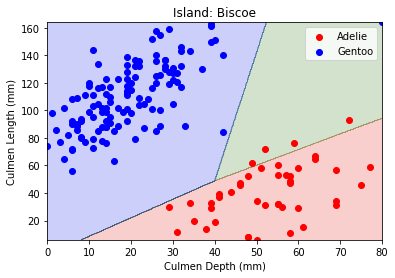

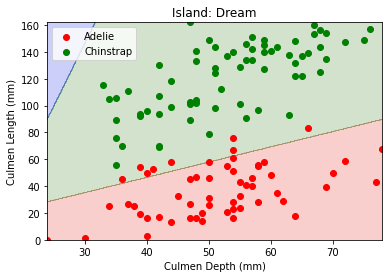

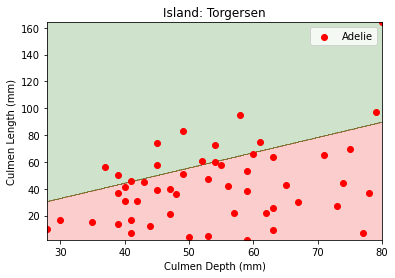

In [63]:
plot_decision_boundary(bestmodel)

### Discussion